## Reading the market data of BAJAJFINSV stock and preparing a training dataset and validation dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Feature Engineering
Almost every time series problem will have some external features or some internal feature engineering to help the model.

Let's add some basic features like lag values of available numeric features that are widely used for time series problems. Since we need to predict the price of the stock for a day, we cannot use the feature values of the same day since they will be unavailable at actual inference time. We need to use statistics like mean, standard deviation of their lagged values.

We will use three sets of lagged values, one previous day, one looking back 7 days and another looking back 30 days as a proxy for last week and last month metrics.

In [2]:
data=pd.read_csv('BAJFINANCE.csv',  date_parser='Date')

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
data['Date']=pd.to_datetime(data['Date'])

In [5]:
data.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [6]:
data.set_index('Date',inplace=True)

In [7]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [8]:
data.copy()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [9]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

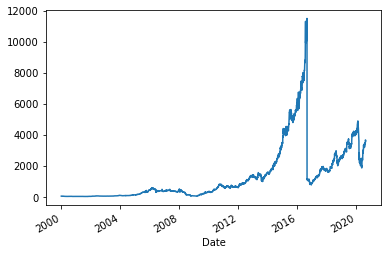

In [10]:
data['VWAP'].plot()

In [11]:
data.shape

(5070, 14)

In [12]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(2291, 14)

In [15]:
df=data.copy()

In [16]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


In [17]:
features=['High','Low','Volume','Turnover','Trades']
for i in features:
    df[i+'_rolling_mean_4']=df['High'].rolling(window=4).mean()
    df[i+'_rolling_mean_7']=df['High'].rolling(window=7).mean()
    df[i+'_rolling_std_4']=df['High'].rolling(window=4).std()
    df[i+'_rolling_std_7']=df['High'].rolling(window=7).std()

In [18]:
df.dropna(inplace=True)

In [19]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Volume_rolling_std_4,Volume_rolling_std_7,Turnover_rolling_mean_4,Turnover_rolling_mean_7,Turnover_rolling_std_4,Turnover_rolling_std_7,Trades_rolling_mean_4,Trades_rolling_mean_7,Trades_rolling_std_4,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,10.492487,7.494911,639.2375,638.592857,10.492487,7.494911,639.2375,638.592857,10.492487,7.494911
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,11.478313,8.227994,641.0500,640.271429,11.478313,8.227994,641.0500,640.271429,11.478313,8.227994
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,9.544326,9.497080,642.0250,638.692857,9.544326,9.497080,642.0250,638.692857,9.544326,9.497080
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.120355,10.198891,638.0125,637.428571,11.120355,10.198891,638.0125,637.428571,11.120355,10.198891
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,11.129344,11.352292,632.0125,634.857143,11.129344,11.352292,632.0125,634.857143,11.129344,11.352292


In [20]:
df.shape

(2285, 34)

In [21]:
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_4', 'High_rolling_mean_7',
       'High_rolling_std_4', 'High_rolling_std_7', 'Low_rolling_mean_4',
       'Low_rolling_mean_7', 'Low_rolling_std_4', 'Low_rolling_std_7',
       'Volume_rolling_mean_4', 'Volume_rolling_mean_7',
       'Volume_rolling_std_4', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_4', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_4', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_4', 'Trades_rolling_mean_7',
       'Trades_rolling_std_4', 'Trades_rolling_std_7'],
      dtype='object')

In [22]:
x_train=df[['High_rolling_mean_4', 'High_rolling_mean_7',
       'High_rolling_std_4', 'High_rolling_std_7', 'Low_rolling_mean_4',
       'Low_rolling_mean_7', 'Low_rolling_std_4', 'Low_rolling_std_7',
       'Volume_rolling_mean_4', 'Volume_rolling_mean_7',
       'Volume_rolling_std_4', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_4', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_4', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_4', 'Trades_rolling_mean_7',
       'Trades_rolling_std_4', 'Trades_rolling_std_7']][0:1800]

In [23]:
y_train=df['VWAP'][0:1800]

In [24]:
x_test=df[['High_rolling_mean_4', 'High_rolling_mean_7',
       'High_rolling_std_4', 'High_rolling_std_7', 'Low_rolling_mean_4',
       'Low_rolling_mean_7', 'Low_rolling_std_4', 'Low_rolling_std_7',
       'Volume_rolling_mean_4', 'Volume_rolling_mean_7',
       'Volume_rolling_std_4', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_4', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_4', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_4', 'Trades_rolling_mean_7',
       'Trades_rolling_std_4', 'Trades_rolling_std_7']][1800:]

In [25]:
y_test=df['VWAP'][1800:]

In [26]:
from pmdarima import auto_arima


In [27]:
ar=auto_arima(y_train,x_train,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=22173.277, Time=13.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=22503.060, Time=2.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22383.755, Time=2.64 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=22272.078, Time=7.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22501.465, Time=10.58 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22182.205, Time=13.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22200.961, Time=12.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=22170.344, Time=14.90 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22179.453, Time=17.64 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=22197.597, Time=16.71 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=22175.484, Time=14.73 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=22180.436, Time=15.95 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=22180.806, Time=14.35 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=22184.258, Time=16.86 sec
 ARIMA(3

In [29]:
model_fit=ar.fit(y_train,x_train)

In [43]:
x_test['y_pred']=model_fit.predict(len(x_test),x_test)

C:\Users\Amit kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='Date'>

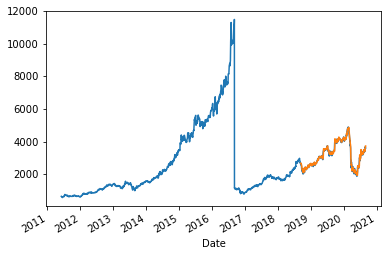

In [48]:
df['VWAP'].plot()
x_test['y_pred'].plot()

In [ ]:
# i dont known how to predict the next data without passing data